<b><font size=6>Сборный проект

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Открытие данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Предобработка данных

## Названия столбцов

In [4]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Обработка пропусков

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Начнем с имени.

In [6]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Попробуем угадать игру.

In [7]:
data.query('platform == "GEN" & year_of_release == "1993.0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Выбора нет, придется удалять.

In [8]:
data = data.dropna(subset=['name'])

In [9]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можем сделать предположение что каждая игра на разных платформах выходит в один год.

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('median'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data['year_of_release'].unique()

array([2006. , 1985. , 2008. , 2009. , 1996. , 1989. , 1984. , 2005. ,
       1999. , 2007. , 2010. , 2013. , 2004. , 1990. , 1988. , 2002. ,
       2001. , 2011. , 1998. , 2015. , 2012. , 2014. , 1992. , 1997. ,
       1993. , 1994. , 1982. , 2016. , 2003. , 1986. , 2000. , 1995. ,
       1991. , 1981. , 1987. , 1980. , 1983. ,    nan, 2002.5, 2013.5,
       2005.5, 2001.5])

Все же, предположение верно не до конца, но думаю такую погрешность опустить можно. В дальнейшем даты нам нужны, а медианные значения их просто пропустят. Потому спокойно уберем эти строки.

In [12]:
data = data.dropna(subset=['year_of_release'])

In [13]:
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


А вот рейтинги мы медианно провести уже не сможем, придется оставить.

In [14]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


А вот tbd обработать не выйдет, как и рейтинги.

In [15]:
data['user_score'] = data['user_score'].apply(pd.to_numeric,errors='coerce')

In [16]:
data['rating'] = data['rating'].fillna('other')
data['rating'].unique()

array(['E', 'other', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [17]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [18]:
#data['total_sales'] = data[['na_sales','eu_sales','jp_sales']].sum(axis=1)

In [19]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## Преобразование типов

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int')

# Анализ данных

## Года игр

In [21]:
years = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').reset_index()
years

,year_of_release,total_sales
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


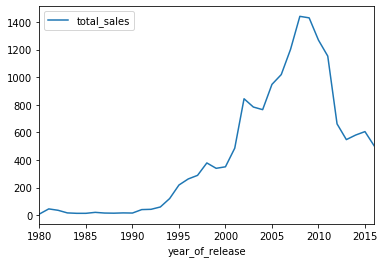

In [22]:
years.plot(x='year_of_release')

1 игра на 4 платформах - это уже 4 игры.

До 94-го года совсем не густо. В дальнейшем можно выделить 2 промежутка: общий с 94-го и пиковый 06-11 года.

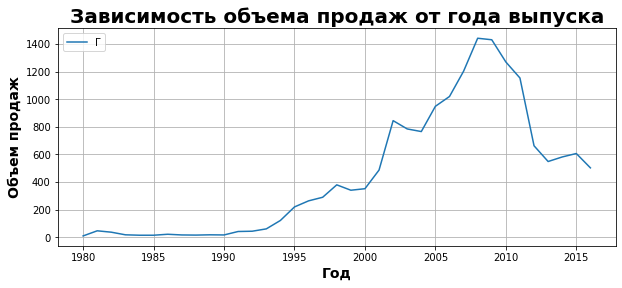

In [67]:
plt.figure(figsize=(10,4))
x = years['year_of_release']
y = years['total_sales']
plt.title('Зависимость объема продаж от года выпуска', fontsize=20, fontweight='bold')
z = plt.plot(x, y)
plt.grid()
plt.xlabel('Год', fontsize=14, fontweight='bold')
plt.ylabel('Объем продаж', fontsize=14, fontweight='bold')
plt.legend(z, 'Год', loc='upper left')
plt.show()

## Самые дорогие платформы

In [24]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.69
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Первые 6 самое то.

In [25]:
platf = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum').reset_index()
platf

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
238,XB,2008,0.18
239,XOne,2013,18.96
240,XOne,2014,54.07
241,XOne,2015,60.14


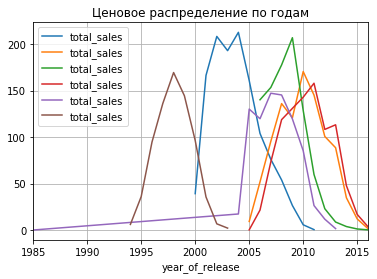

In [26]:
ps2 = platf.query('platform == "PS2"').plot(x='year_of_release',y='total_sales')
x360 = platf.query('platform == "X360"').plot(x='year_of_release',y='total_sales', ax=ps2)
wii = platf.query('platform == "Wii"').plot(x='year_of_release',y='total_sales', ax=x360)
ps3 = platf.query('platform == "PS3"').plot(x='year_of_release',y='total_sales', ax=wii)
ds = platf.query('platform == "DS"').plot(x='year_of_release',y='total_sales', ax=ps3)
ps = platf.query('platform == "PS"').plot(x='year_of_release',y='total_sales', ax=ds)
plt.title('Ценовое распределение по годам')
plt.grid()
plt.show()

Условно говоря платформа живет в пределах 10 лет.

## Актуальный период

Пик продаж приходится на 2009-й год. Я бы взял путь с него, хотя не уверен.

In [28]:
# Проверим самый последний год, кто был лидером. Все же я делаю ставку на новые платформы.
data.query('year_of_release==2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

И это разгром. Давайте также сравним графики для первых трех платформ за 16-й год.

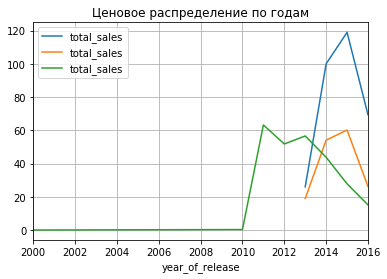

In [29]:
ps4 = platf.query('platform == "PS4"').plot(x='year_of_release',y='total_sales')
xone = platf.query('platform == "XOne"').plot(x='year_of_release',y='total_sales', ax=ps4)
ds3 = platf.query('platform == "3DS"').plot(x='year_of_release',y='total_sales', ax=xone)
plt.title('Ценовое распределение по годам')
plt.grid()
plt.show()

In [30]:
# Проверим также 15-й год.
data.query('year_of_release==2015').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: total_sales, dtype: float64

Что и следовало доказать. В 15-м году "3-я плойка" и "360-й" доживали последние дни, а переносные консоли уже не обладают таким спросом. Изучив сами консоли могу взять на себя ответственость считать актуальным период с 2014 по 2016 включительно.

In [31]:
newdata = data.query('year_of_release in ("2014","2015","2016")')
newdata

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,other,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,other,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,other,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01


## Лидеры продаж

In [32]:
newdata.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Вывод: те же топ 3, что и выше. С разницей что 3ds тоже умирает.

In [34]:
pd.crosstab(newdata.platform, 
            newdata.year_of_release,
            margins=True, margins_name="total"
           ).sort_values(by='total', ascending=False)

year_of_release,2014,2015,2016,total
platform,,,,
total,581,606,502,1689
PS4,75,137,164,376
PSV,100,110,85,295
XOne,61,80,87,228
PS3,108,73,38,219
3DS,80,86,46,212
PC,47,50,54,151
X360,63,35,13,111
WiiU,31,28,14,73


Самой актуальной платформой является PS4, у нее явный рост продаж. С меньшим количеством, но той же скоростью идет XOne. У PSV и 3DS продажи уже падают, причем у второй намного стремительнее, здесь нужно уже смотреть по регионам. PC продаваться будет всегда пока есть статические консоли по простой причине - консоль дает оптимальный показатель качества графики и производительности, но не лучший.

## Глобальные продажи по платформам

In [36]:
globl = newdata.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
globl

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [37]:
top_globl = ['PS4','XOne','3DS']

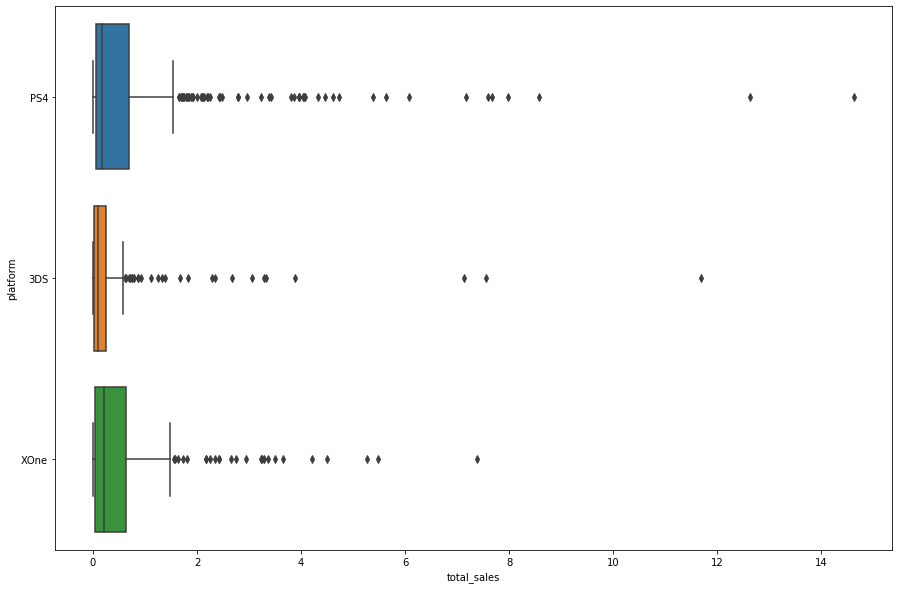

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(y='platform', x='total_sales',
            data = newdata.query('platform in @top_globl')
            )
plt.show()

Вот тут видно что после подъема новых приставок (специально старт не в 2012) последующие продажи идут в одинаковом соотношении, но различаются суммы.

## Влияние отзывов

In [39]:
data_ps4 = newdata.query('platform == "PS4"').reset_index(drop=True)
data_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,other,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,other,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
371,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,other,0.01
372,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,other,0.01
373,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
374,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [40]:
print(data_ps4['user_score'].unique())
print(data_ps4['critic_score'].unique())

[nan 8.3 4.3 5.7 5.  6.5 6.1 7.9 8.1 3.4 8.4 6.3 7.7 9.2 4.9 7.6 6.7 7.
 8.2 6.8 5.9 8.6 7.3 7.4 6.  7.1 5.1 6.6 5.4 4.5 8.8 6.2 7.8 8.5 7.2 7.5
 5.5 6.9 3.6 3.7 5.6 8.  8.7 5.8 3.8 4.7 3.3 1.5 4.1 6.4 1.9 3.  3.5 2.
 2.3]
[nan 97. 82. 83. 85. 87. 76. 93. 86. 77. 88. 80. 92. 70. 84. 73. 81. 90.
 74. 71. 89. 79. 68. 75. 63. 61. 62. 69. 78. 67. 65. 72. 60. 48. 66. 59.
 57. 32. 53. 47. 58. 45. 19. 44. 64. 42. 25. 52. 43. 31. 55. 49. 51.]


In [41]:
print('Соотношение продаж PS4 к оценке критиков {0:.2f}'.format(data_ps4['total_sales'].corr(data_ps4['critic_score'])))
# data_ps4['total_sales'].corr(data_ps4['user_score'])
# А вот тут нам tbd таки помешали
data_ps4['user_score'] = data_ps4['user_score'].apply(pd.to_numeric,errors='coerce')
print('Соотношение продаж PS4 к оценке пользователей {0:.2f}'.format(data_ps4['total_sales'].corr(data_ps4['user_score'])))

Соотношение продаж PS4 к оценке критиков 0.40
Соотношение продаж PS4 к оценке пользователей -0.04


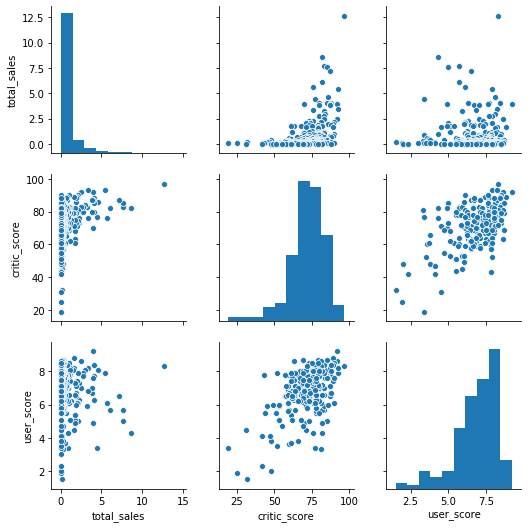

In [42]:
score_ps4 = sns.pairplot(data_ps4[['total_sales', 'critic_score', 'user_score']])
plt.show()

Как влияют отзывы на продажи? Ну если оценки критиков хоть пытаются влиять, то пользовательские отзывы вообще никак.

## Другие платформы

In [43]:
newdata['user_score'] = newdata['user_score'].apply(pd.to_numeric,errors='coerce')
data_xone = newdata.query('platform == "XOne"').reset_index(drop=True)
data_ds3 = newdata.query('platform == "3DS"').reset_index(drop=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
print('Соотношение продаж Xone к оценке критиков {0:.2f}'.format(data_xone['total_sales'].corr(data_xone['critic_score'])))
print('Соотношение продаж XOne к оценке пользователей {0:.2f}'.format(data_xone['total_sales'].corr(data_xone['user_score'])))

Соотношение продаж Xone к оценке критиков 0.43
Соотношение продаж XOne к оценке пользователей -0.07


In [45]:
print('Соотношение продаж 3DS к оценке критиков {0:.2f}'.format(data_ds3['total_sales'].corr(data_ds3['critic_score'])))
print('Соотношение продаж 3DS к оценке пользователей {0:.2f}'.format(data_ds3['total_sales'].corr(data_ds3['user_score'])))

Соотношение продаж 3DS к оценке критиков 0.31
Соотношение продаж 3DS к оценке пользователей 0.22


Статистика Xbox последовала примеру PS4, а вот по 3DS отзывы людей...правдоподобнее что ли?

## Жанры

In [47]:
genres = newdata.pivot_table(index='genre', columns='year_of_release', values='total_sales', aggfunc='sum',
                             margins=True, margins_name='total').sort_values(by='total', ascending=False).reset_index()
genres

year_of_release,genre,2014,2015,2016,total
0,total,331.53,267.98,129.94,729.45
1,Action,97.23,72.02,30.11,199.36
2,Shooter,65.21,67.51,38.22,170.94
3,Sports,45.15,40.84,23.49,109.48
4,Role-Playing,45.62,37.64,18.18,101.44
5,Misc,23.38,11.57,2.60,37.55
6,Fighting,15.85,7.90,4.47,28.22
7,Racing,16.66,8.07,2.79,27.52
8,Platform,8.81,6.05,3.23,18.09
9,Adventure,5.57,8.16,3.82,17.55


Экшены и шутеры впереди всех, за ними спортивные (не удивлюсь половине продаж от фифа) и рпг. Хуже всего продаются пазлы и стратегии (ну не консольный это жанр).

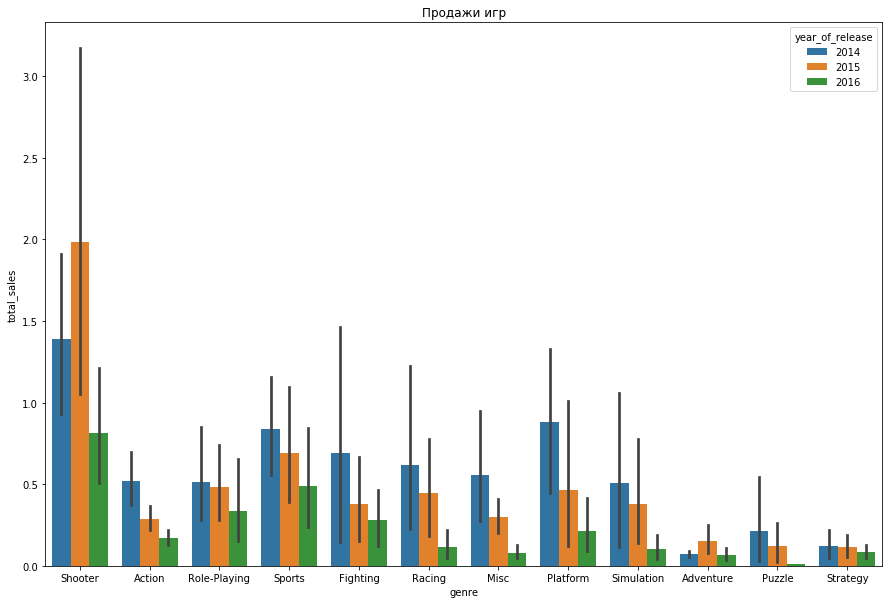

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x='genre',
            y='total_sales', 
            hue='year_of_release', 
            data = newdata
           )
plt.title('Продажи игр')
plt.show()

# Портреты пользователей

## ТОП-5 платформ

In [49]:
data_na = newdata.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
data_na.head(5)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [50]:
data_eu = newdata.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
data_eu.head(5)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [51]:
data_jp = newdata.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
data_jp.head(5)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Nintendo 3DS, PlayStation Vita и WiiU - это портативные приставки. Исходя из этого можем сделать предположение что жители Японии слишком заняты и большую часть игрового времени проводят не дома, а значит рынок "статических" устройств им не интересен. Также важно понимать что рынок кибер-развлечений Японии очень обширный, потому приставки не смогут добиться там такого же успеха как на западе.

На западе же все логично и вполне закономерно - в топе новые приставки от Sony и Microsoft, а сразу за ними предыдущее поколение.

## ТОП-5 жанров

In [52]:
data_na = newdata.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
data_na.head(5)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [53]:
data_eu = newdata.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
data_eu.head(5)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [54]:
data_jp = newdata.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
data_jp.head(5)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

И снова ничего удивительного. Экшен и шутеры, затем фифа, нба и тд. В современное время это чуть ли не стандартный набор большинства игроков. Но не из Японии. В жанре игр это отдельное государство, японские рпг jrpg можно выносить отдельным жанром. Серию Final Fantasy хоть раз да слышал каждый игрок мира. На 2-м месте все же закрепились экшен-игры с небольшим отрывом и затем все равно в бой вступают MK, Naruto, Street Fighter.... И это еще тут Tekken не видно.

## ESRB

E - everyone, \
E10+ - everyone 10+, \
T - teen, \
M - mature 17, \
AO - adults only 18+, \
RP - not assigned final rating

In [55]:
esrb_na = newdata.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_na

rating
M        96.42
other    64.72
E        50.74
T        38.95
E10+     33.23
Name: na_sales, dtype: float64

In [56]:
esrb_eu = newdata.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_eu

rating
M        93.44
other    58.95
E        58.06
T        34.07
E10+     26.16
Name: eu_sales, dtype: float64

In [57]:
esrb_jp = newdata.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
esrb_jp

rating
other    56.90
T        14.78
E         8.94
M         8.01
E10+      4.46
Name: jp_sales, dtype: float64

Мы видим что на западе преобладают игры постарше, затем общие и для подростков. В Японии как 1-е и 3-е места поменялись

# Гипотезы

## Гипотеза 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0 - Рейтинги пользователей платформ Xbox One и PC равны. \
H1 - Рейтинги пользователей платформ Xbox One и PC не равны.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Гипотезы корректны.</div>

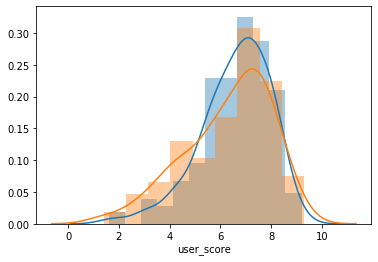

In [58]:
xbox = newdata.query('platform == "XOne" & user_score.notna()').reset_index(drop=True)
pc = newdata.query('platform == "PC" & user_score.notna()').reset_index(drop=True)

sns.distplot(xbox['user_score'])
sns.distplot(pc['user_score'])

In [59]:
print(xbox['user_score'].mean())
print(pc['user_score'].mean())

6.594545454545456
6.298360655737705


Проверим дисперсии.

In [60]:
var_xbox = sum([(x - xbox['user_score'].mean())**2 for x in xbox['user_score']]) / len(xbox['user_score'])
print(var_xbox)
var_pc = sum([(x - pc['user_score'].mean())**2 for x in pc['user_score']]) / len(pc['user_score'])
print(var_pc)

1.8795460055096413
2.8773743617307175


Так как средние у нас не равны, берем метод ttest_ind.

In [61]:
from scipy import stats as st

alpha = 0.05
result = st.ttest_ind(xbox['user_score'], pc['user_score'])

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Значит - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

## Гипотеза 2

Средние пользовательские рейтинги жанров Action и Sports разные.

H0 - Средние пользовательские рейтинги жанров Action и Sports равны. \
H1 - Средние пользовательские рейтинги жанров Action и Sports разные.

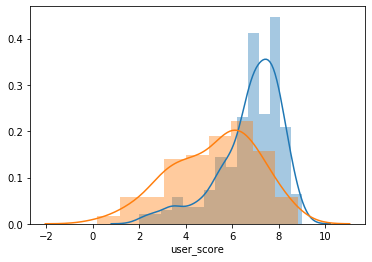

In [62]:
action = newdata.query('genre == "Action" & user_score.notna()').reset_index(drop=True)
sports = newdata.query('genre == "Sports" & user_score.notna()').reset_index(drop=True)

sns.distplot(action['user_score'])
sns.distplot(sports['user_score'])

In [63]:
print(action['user_score'].mean())
print(sports['user_score'].mean())

6.760606060606061
5.2251968503937


In [64]:
var_action = sum([(x - action['user_score'].mean())**2 for x in action['user_score']]) / len(action['user_score'])
print(var_action)
var_sports = sum([(x - sports['user_score'].mean())**2 for x in sports['user_score']]) / len(sports['user_score'])
print(var_sports)

1.8920844811753912
3.4198375596751185


In [65]:
alpha = 0.05
result = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Значит - средние пользовательские рейтинги Action и Sport разные.

# Вывод

Магазину нужно закупиться играми жанров Shooter, Action и Sports категорий E и М на Xbox One и PlayStation 4 для Запада и Европы, а также внимательно обдумать закупку RPG и Action (и возможно Fighting) для Nintendo 3DS для Востока.